<a href="https://colab.research.google.com/github/SahilCarterr/Hugging-Face-Models/blob/main/Diffusers-Model/05_Load_LoRAs_for_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers accelerate peft diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 68.2 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline
import torch
pipe_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(pipe_id, torch_dtype=torch.float16).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.w

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
pipe.load_lora_weights("CiroN2022/toy-face", weight_name="toy_face_sdxl.safetensors", adapter_name="toy")

toy_face_sdxl.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

  0%|          | 0/30 [00:00<?, ?it/s]

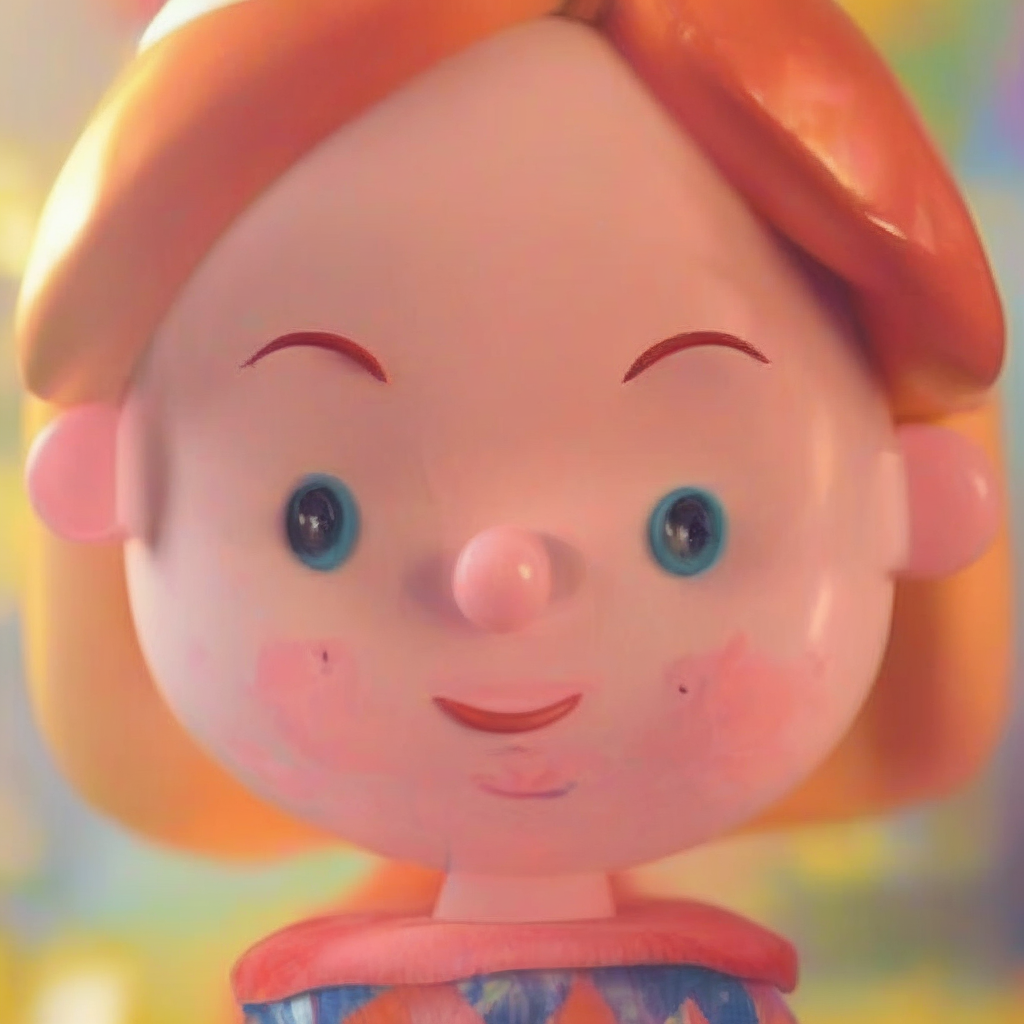

In [5]:
prompt="toy face of a beautiful girl"
lora_scale = 0.9
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

In [6]:
pipe.load_lora_weights("nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors", adapter_name="pixel")
pipe.set_adapters("pixel")

pixel-art-xl.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

  0%|          | 0/30 [00:00<?, ?it/s]

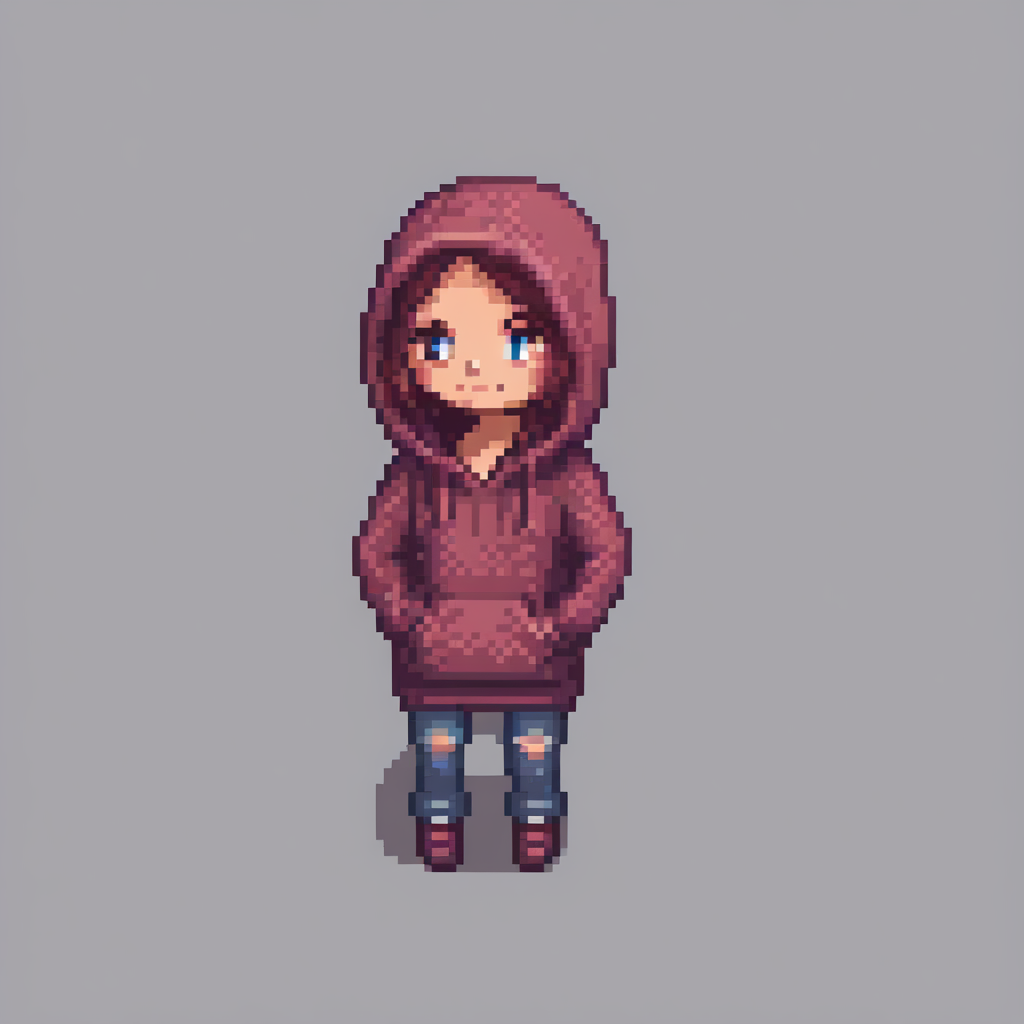

In [7]:
prompt = "a girl with a hoodie, pixel art"
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

In [8]:
pipe.set_adapters(["pixel", "toy"], adapter_weights=[0.5, 1.0])

  0%|          | 0/30 [00:00<?, ?it/s]

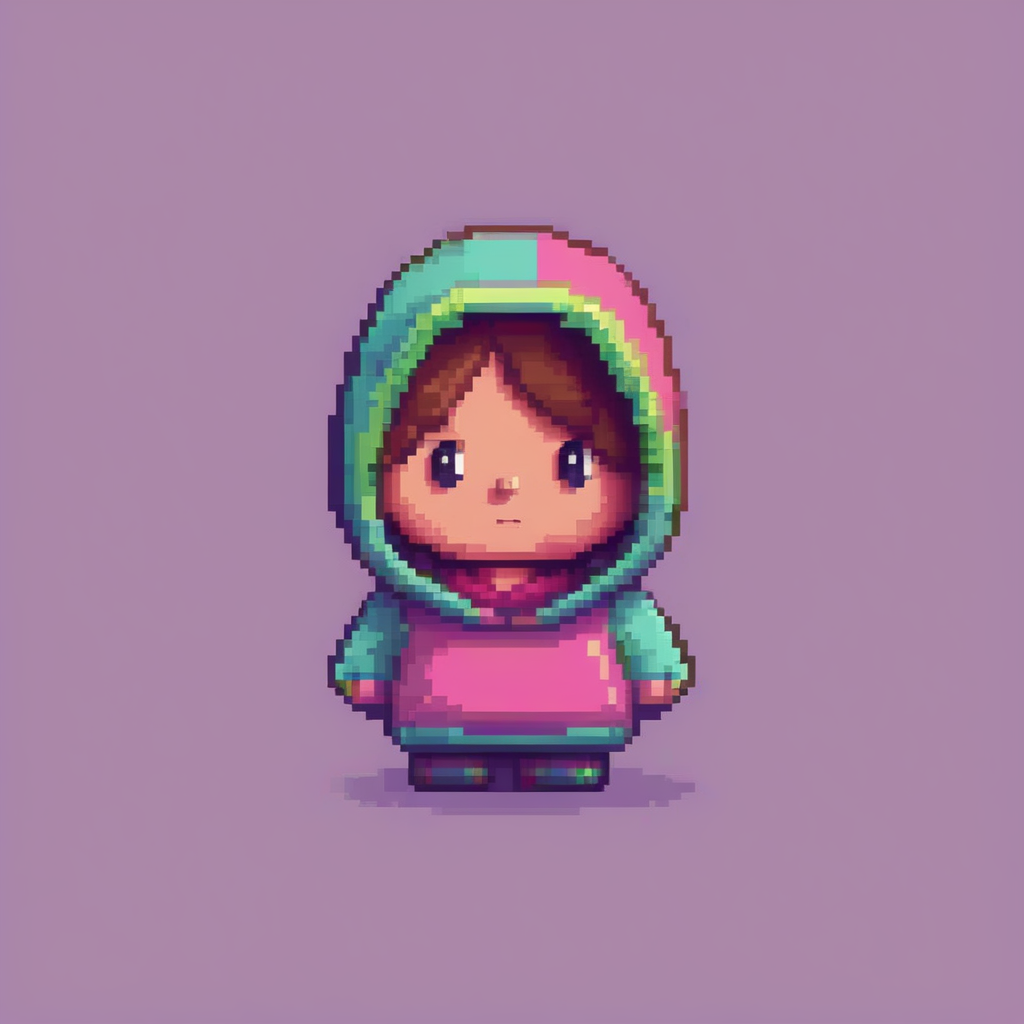

In [9]:
prompt = "toy_face of a girl with a hoodie, pixel art"
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": 1.0}, generator=torch.manual_seed(0)
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

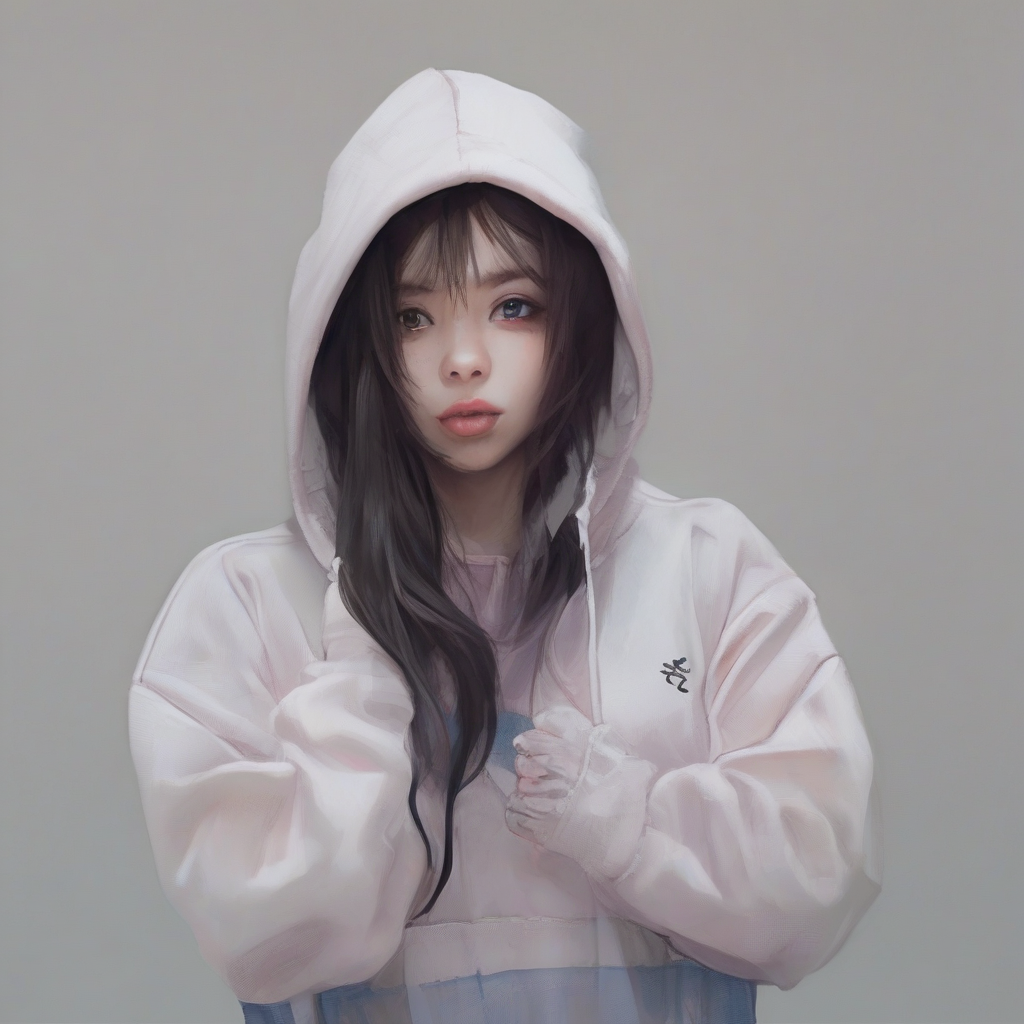

In [10]:
pipe.disable_lora()

prompt = "toy_face of a girl with a hoodie"
image = pipe(prompt, num_inference_steps=30, generator=torch.manual_seed(0)).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

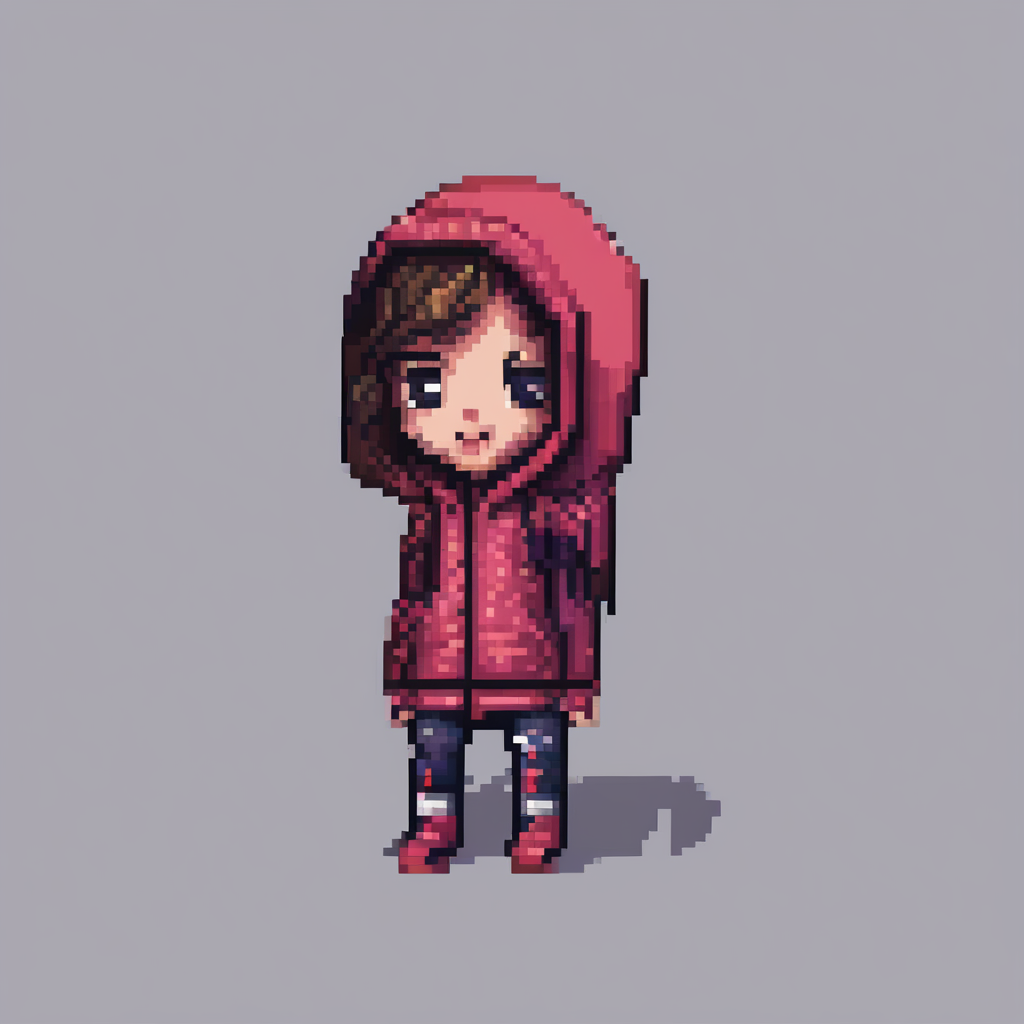

In [11]:
pipe.enable_lora()  # enable lora again, after we disabled it above
prompt = "toy_face of a girl with a hoodie, pixel art"
adapter_weight_scales = { "unet": { "down": 1, "mid": 0, "up": 0} }
pipe.set_adapters("pixel", adapter_weight_scales)
image = pipe(prompt, num_inference_steps=30, generator=torch.manual_seed(0)).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

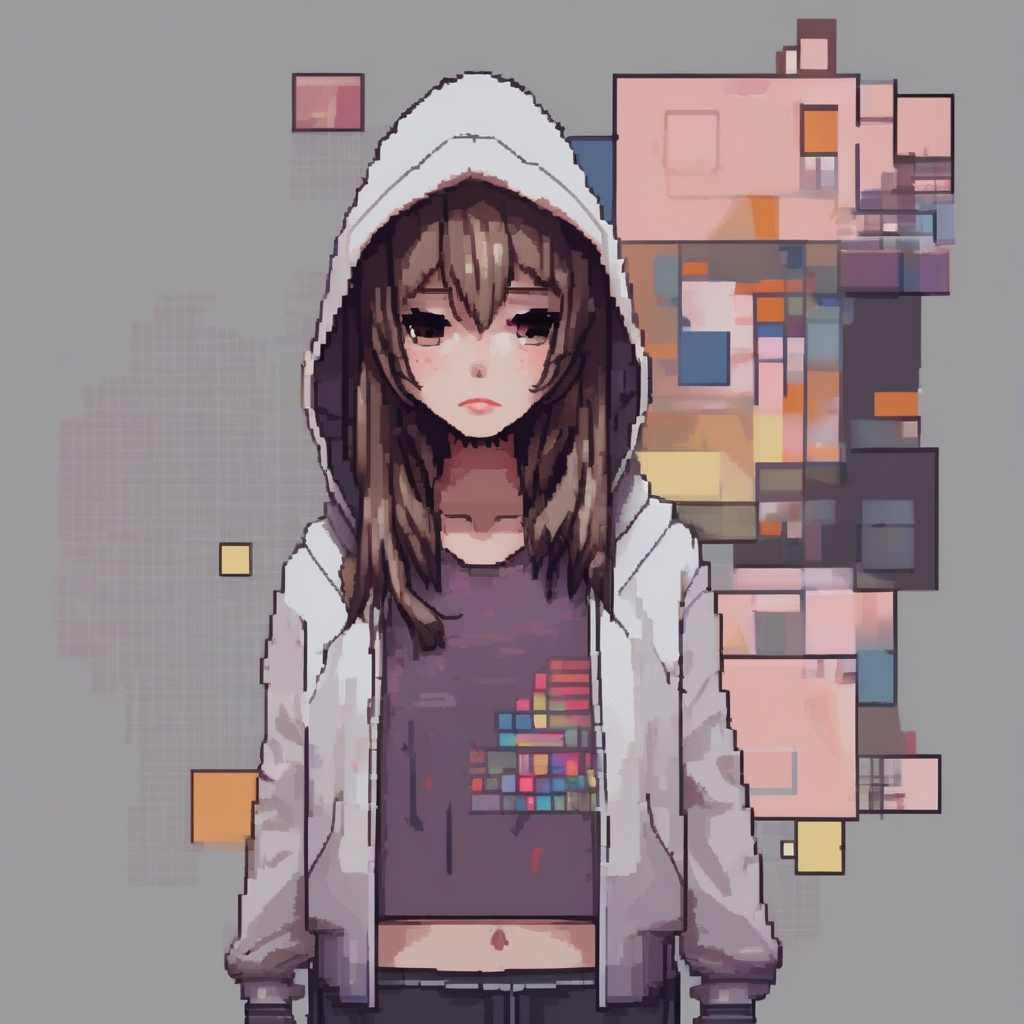

In [12]:
adapter_weight_scales = { "unet": { "down": 0, "mid": 1, "up": 0} }
pipe.set_adapters("pixel", adapter_weight_scales)
image = pipe(prompt, num_inference_steps=30, generator=torch.manual_seed(0)).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

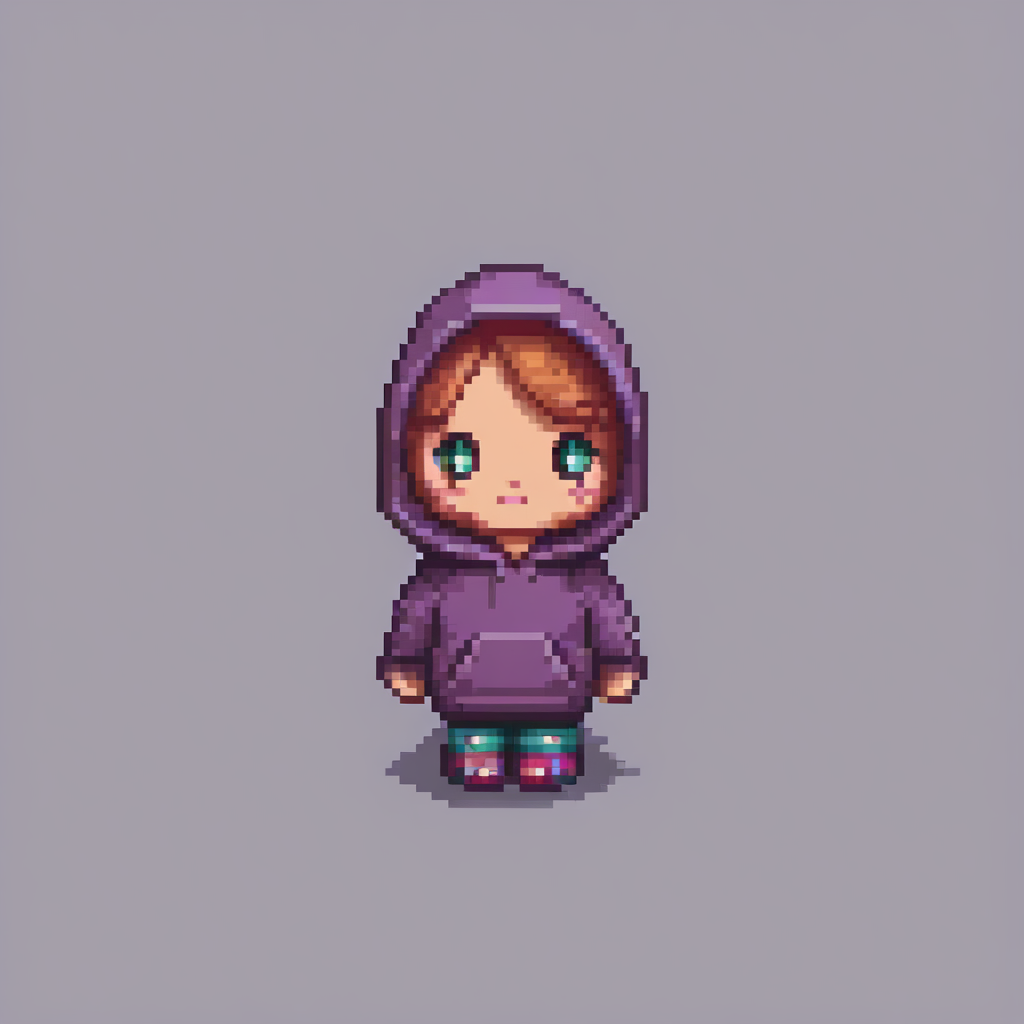

In [13]:
adapter_weight_scales_toy = 0.5
adapter_weight_scales_pixel = {
    "unet": {
        "down": 0.9,  # all transformers in the down-part will use scale 0.9
        # "mid"  # because, in this example, "mid" is not given, all transformers in the mid part will use the default scale 1.0
        "up": {
            "block_0": 0.6,  # all 3 transformers in the 0th block in the up-part will use scale 0.6
            "block_1": [0.4, 0.8, 1.0],  # the 3 transformers in the 1st block in the up-part will use scales 0.4, 0.8 and 1.0 respectively
        }
    }
}
pipe.set_adapters(["toy", "pixel"], [adapter_weight_scales_toy, adapter_weight_scales_pixel])
image = pipe(prompt, num_inference_steps=30, generator=torch.manual_seed(0)).images[0]
image

In [15]:
active_adapters = pipe.get_active_adapters()
active_adapters

['toy', 'pixel']

In [16]:
list_adapters_component_wise = pipe.get_list_adapters()
list_adapters_component_wise

{'unet': ['toy', 'pixel']}